# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Ziyan Faradis Mumtaza
- **Email:** ahmadziyan@mail.ugm.ac.id
- **ID Dicoding:** M008D4KY1383

## Menentukan Pertanyaan Bisnis

- Pada waktu apa orang paling banyak menyewa sepeda? (musim, jam, hari, bulan, cuaca, jam kerja/holiday)

- Variabel apa yang paling berpengaruh pada pertambahan/pengurangan jumlah rental bike per jam? menggunakan variabel cnt sebagai respon (count of total rental bikes including both casual and registered)

## Import Semua Packages/Library yang Digunakan

In [125]:
!pip install pipreqsnb

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat tabel dari Bike Sharing Dataset.**





Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame. \\


In [127]:
bikesharing_df = pd.read_csv("https://raw.githubusercontent.com/ahmadziyanfm/Dataset-Dicoding-Ziyan/main/hour.csv")
bikesharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Keterangan data : \\
	- instant: record index \\
	- dteday : date \\
	- season : season (1:springer, 2:summer, 3:fall, 4:winter) \\
	- yr : year (0: 2011, 1:2012) \\
	- mnth : month ( 1 to 12) \\
	- hr : hour (0 to 23) \\
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) \\
	- weekday : day of the week \\
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. \\
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max) \\
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max) \\
	- hum: Normalized humidity. The values are divided to 100 (max) \\
	- windspeed: Normalized wind speed. The values are divided to 67 (max) \\
	- casual: count of casual users \\
	- registered: count of registered users  \\
	- cnt: count of total rental bikes including both casual and registered \\

Oke, sekarang kita telah berhasil memuat semua data yang dibutuhkan. Tahap selanjutnya ialah menilai kualitas dari data tersebut.

### Assessing Data

Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

**Menilai Data bikesharing_df**



*   Cek Tipe Data



Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam bikesharing_df.

In [128]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan terdapat permasalahan pada tipe data variabel dteday yang harusnya bertipe date, maka variabelnya akan kita ubah terlebih dahulu menjadi tipe date ketika proses cleaning data.



*   Cek Duplikasi Data



Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [129]:
print("Jumlah duplikasi: ", bikesharing_df.duplicated().sum())

Jumlah duplikasi:  0


Diperoleh bahwa tidak ada duplikasi pada data tersebut.



*   Cek Missing Value


In [130]:
bikesharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas diketahui bahwa tidak ada missing value.



*   Cek Innacurate Value


Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam bikesharing_df_cleaned. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame.

In [131]:
bikesharing_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil diatas dilihat dari mean, min, max, dan standar deviasi nya tidak ada yang aneh/janggal. Jadi, dapat disimpulkan bahwa data sudah akurat.

### Cleaning Data

**Membersihkan Data bikesharing_df**



*   Mengganti tipe data yang benar \\
Tipe data pada variabel dteday harus diubah menjadi tipe data date



In [132]:
#Change type date
bikesharing_df_cleaned = bikesharing_df.copy()

bikesharing_df_cleaned['dteday']=pd.to_datetime(bikesharing_df_cleaned['dteday'])
print(bikesharing_df_cleaned.info())
bikesharing_df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Berdasarkan hasil diatas, tipe data dteday telah berhasil diubah dari tipe data object menjadi tipe data date

Berdasarkan hasil data wrangling telah diperoleh juga bahwa tidak ada missing value, duplicate value, maupun innacurate value.



*   Mengembalikan nilai asli data



Pada keterangan data diketahui bahwa, bebeerapa variabel pada data yang diberi, nilainya sudah dibagi dengan bilangan tertentu. Maka kita dapat mengembalikan ke nominal aslinya. Berikut beberapa variabel tersebut : \\
temp : Normalized temperature in Celsius. The values are divided to 41 (max),
atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max),
hum: Normalized humidity. The values are divided to 100 (max),
windspeed: Normalized wind speed. The values are divided to 67 (max)

In [133]:
bikesharing_df_cleaned['temp']=bikesharing_df_cleaned['temp']*41
bikesharing_df_cleaned['atemp']=bikesharing_df_cleaned['atemp']*50
bikesharing_df_cleaned['hum']=bikesharing_df_cleaned['hum']*100
bikesharing_df_cleaned['windspeed']=bikesharing_df_cleaned['windspeed']*67

print(bikesharing_df_cleaned.info())
bikesharing_df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


Diperoleh nilai asli dari variabel temp, atemp, hum, dan windspeed.

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset (hour.csv)

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data bikesharing_df_cleaned menggunakan method describe().

In [134]:
bikesharing_df_cleaned.describe(include="all")

<ipython-input-134-c1474b7e7d26>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikesharing_df_cleaned.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh peminjaman/rental sepeda dilakukan pada rata-rata suhu 20.376474 derajat	celcius, dengan suhu terendah pada 0.82 derajat celcius dan tertinggi pada 41 derajat celcius. Selain itu rata-rata peminjaman sepeda per jam sebesar 189.463088 dengan standar deviasinya sebesar 181.387599.

Sekarang coba kita lihat kapan peminjaman teramai.

In [135]:
bikesharing_df_cleaned.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,27.06,31.06,44.0,16.9979,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,26.24,31.06,50.0,15.0013,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,28.70,31.82,28.0,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,25.42,31.06,35.0,19.9995,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,27.06,31.06,39.0,19.0012,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,20.50,24.24,82.0,16.9979,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,10.66,12.88,56.0,11.0014,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,10.66,12.88,56.0,11.0014,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,8.20,9.85,47.0,12.9980,0,1,1


Diperoleh informasi bahwa rental paling banyak dilakukan sebesar 977 penyewaan, yang terjadi pada pukul 18.00, bulan September, pada musim fall 2012.

Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait musim, jam, hari, bulan, cuaca teramai

In [136]:
jamteramai = bikesharing_df_cleaned.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(jamteramai)
hariteramai = bikesharing_df_cleaned.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(hariteramai)
bulanteramai = bikesharing_df_cleaned.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(bulanteramai)
cuacateramai = bikesharing_df_cleaned.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(cuacateramai)
print(jamteramai.max())
print(hariteramai.max())
print(bulanteramai.max())
print(cuacateramai.max())

    instant     cnt
hr                 
0       726   39130
1       724   24164
2       715   16352
3       697    8174
4       697    4428
5       717   14261
6       725   55132
7       727  154171
8       727  261001
9       727  159438
10      727  126257
11      727  151320
12      728  184414
13      729  184919
14      729  175652
15      729  183149
16      730  227748
17      730  336860
18      728  309772
19      728  226789
20      728  164550
21      728  125445
22      728   95612
23      728   63941
         instant     cnt
weekday                 
0           2502  444027
1           2479  455503
2           2453  469109
3           2475  473048
4           2471  485395
5           2487  487790
6           2512  477807
      instant     cnt
mnth                 
1        1429  134933
2        1341  151352
3        1473  228920
4        1437  269094
5        1488  331686
6        1440  346342
7        1488  344948
8        1475  351194
9        1437  345991
10       1451

Diperoleh jam teramai terjadi pada jam 17.00 dengan jumlah rental sebanyak 336860, hari teramai yaitu pada hari Sabtu dengan total jumlah rental sebanyak 487790, bulan teramai yaitu bulan Agustus dengan jumlah rental sebanyak 351194, cuaca teramai yaitu cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dengan total rental sebanyak 2338173.

Selanjutnya kita akan melihat rental paling banyak dilakukan pada musim apa dan apakah ketika working day atau holiday

In [137]:
workdayteramai = bikesharing_df_cleaned.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(workdayteramai)

holidayteramai = bikesharing_df_cleaned.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(holidayteramai)

            instant      cnt
workingday                  
0              5514  1000269
1             11865  2292410
         instant      cnt
holiday                  
0          16879  3214244
1            500    78435


Diperoleh kesimpulan bahwa penyewaan sepeda paling banyak terjadi pada working day.

In [138]:
musimteramai = bikesharing_df_cleaned.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": "sum",
})
print(musimteramai)

        instant      cnt
season                  
1          4242   471348
2          4409   918589
3          4496  1061129
4          4232   841613


Berdasarkan hasil di atas diketahui bahwa musim dengan peminjaman teramai/terbanyak adalah pada musim 3 (fall).

## Visualization & Explanatory Analysis

**- Membuat line chart harian dan bulanan data jumlah rental sepeda**

Pertama-tama, akan kita buat line chart hariannya.

In [139]:
kolom_tertentu = bikesharing_df_cleaned[['dteday', 'cnt']]
kolom_tertentu.head()

,dteday,cnt
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


Kita akan mengubah data yang mulanya perjam menjadi perhari dengan syntax berikut,

In [140]:
# Menjadikan kolom 'Date' sebagai indeks
kolom_tertentu.set_index('dteday', inplace=True)

# Resample data ke tingkat harian dan menjumlahkan nilai tabel cnt
daily_cnt = kolom_tertentu.resample('D').sum()

# Menampilkan DataFrame hasil
print(daily_cnt)

             cnt
dteday          
2011-01-01   985
2011-01-02   801
2011-01-03  1349
2011-01-04  1562
2011-01-05  1600
...          ...
2012-12-27  2114
2012-12-28  3095
2012-12-29  1341
2012-12-30  1796
2012-12-31  2729

[731 rows x 1 columns]


In [141]:
# Menjadikan indeks sebagai kolom dan mereset indeks
daily_cnt.reset_index(inplace=True)

# Mengganti nama kolom 'dteday' menjadi 'Tanggal' dan 'A' menjadi 'Sum'
daily_cnt.rename(columns={'dteday': 'day', 'cnt': 'cnt_day'}, inplace=True)

# Menampilkan DataFrame baru
print(daily_cnt)

           day  cnt_day
0   2011-01-01      985
1   2011-01-02      801
2   2011-01-03     1349
3   2011-01-04     1562
4   2011-01-05     1600
..         ...      ...
726 2012-12-27     2114
727 2012-12-28     3095
728 2012-12-29     1341
729 2012-12-30     1796
730 2012-12-31     2729

[731 rows x 2 columns]


Berdasarkan hasil di atas telah diperoleh dataframe variabel cnt per harinya. Selanjutnya, akan kita buat line chartnya

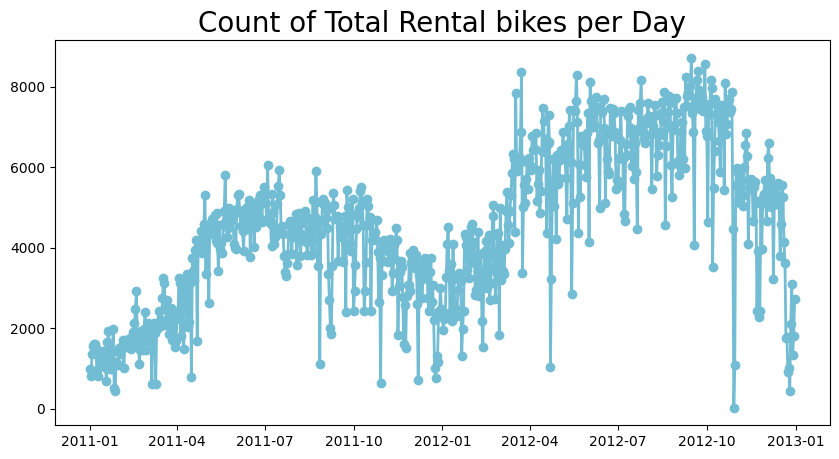

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(daily_cnt["day"], daily_cnt["cnt_day"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Count of Total Rental bikes per Day", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Diperoleh line chart jumlah rental sepeda per hari di atas.

Selanjutnya, akan kita buat data harian menjadi data bulanan, dengan syntax berikut,

In [143]:
# Menjadikan kolom 'Date' sebagai indeks
daily_cnt.set_index('day', inplace=True)

# Resample data ke tingkat harian dan menjumlahkan nilai tabel cnt
monthly_cnt = daily_cnt.resample('M').sum()

# Menampilkan DataFrame hasil
print(monthly_cnt)

            cnt_day
day                
2011-01-31    38189
2011-02-28    48215
2011-03-31    64045
2011-04-30    94870
2011-05-31   135821
2011-06-30   143512
2011-07-31   141341
2011-08-31   136691
2011-09-30   127418
2011-10-31   123511
2011-11-30   102167
2011-12-31    87323
2012-01-31    96744
2012-02-29   103137
2012-03-31   164875
2012-04-30   174224
2012-05-31   195865
2012-06-30   202830
2012-07-31   203607
2012-08-31   214503
2012-09-30   218573
2012-10-31   198841
2012-11-30   152664
2012-12-31   123713


In [144]:
# Menjadikan indeks sebagai kolom dan mereset indeks
monthly_cnt.reset_index(inplace=True)

# Mengganti nama kolom 'dteday' menjadi 'Tanggal' dan 'A' menjadi 'Sum'
monthly_cnt.rename(columns={'day': 'month', 'cnt_day': 'cnt_month'}, inplace=True)

# Menampilkan DataFrame baru
print(monthly_cnt)

        month  cnt_month
0  2011-01-31      38189
1  2011-02-28      48215
2  2011-03-31      64045
3  2011-04-30      94870
4  2011-05-31     135821
5  2011-06-30     143512
6  2011-07-31     141341
7  2011-08-31     136691
8  2011-09-30     127418
9  2011-10-31     123511
10 2011-11-30     102167
11 2011-12-31      87323
12 2012-01-31      96744
13 2012-02-29     103137
14 2012-03-31     164875
15 2012-04-30     174224
16 2012-05-31     195865
17 2012-06-30     202830
18 2012-07-31     203607
19 2012-08-31     214503
20 2012-09-30     218573
21 2012-10-31     198841
22 2012-11-30     152664
23 2012-12-31     123713


Berdasarkan hasil di atas, telah diperoleh dataframe cnt bulanan. Selanjutnya, akan kita buat line chartnya.

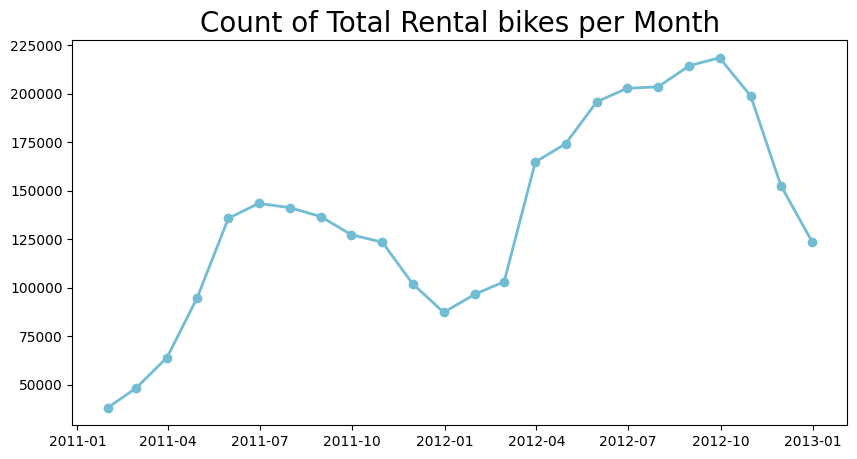

In [145]:

plt.figure(figsize=(10, 5))
plt.plot(monthly_cnt["month"], monthly_cnt["cnt_month"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Count of Total Rental bikes per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah rental terbanyak terjadi pada bulan September 2012.

Selanjutnya kita akan memvisualisasikan waktu2 teramai (mulai dari musim, jam, hari, bulan, cuaca, jam kerja/holiday)

**- Membuat pie chart data musim teramai**

Pertama-tama kita harus membuat data musim berdasarkan jumlah rental bikes nya dan menjumlahkannya.

In [146]:
musimramai2=musimteramai
# Menjadikan indeks sebagai kolom dan mereset indeks
musimramai2.reset_index(inplace=True)

# Mengganti nama kolom
musimramai2.rename(columns={'season': 'musim', 'instant': 'number', 'cnt': 'cnt_musim'}, inplace=True)
musimramaifix = musimramai2[['musim', 'cnt_musim']]


# Menampilkan DataFrame baru
print(musimramaifix)

   musim  cnt_musim
0      1     471348
1      2     918589
2      3    1061129
3      4     841613


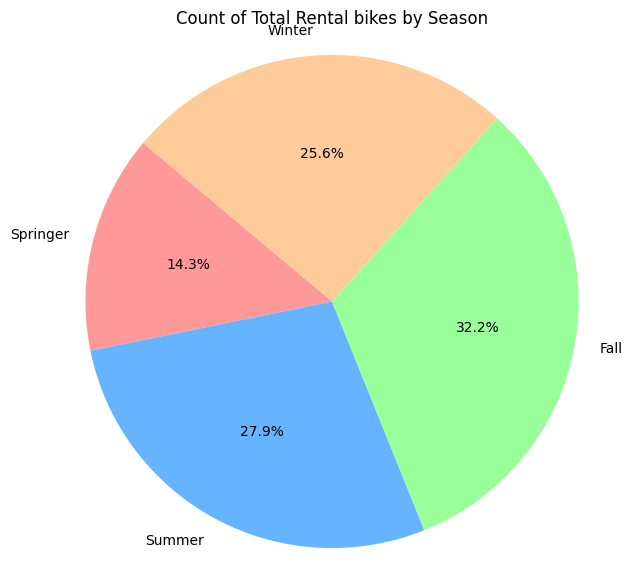

In [147]:
# Data contoh
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mengubah nilai label
renamedmusimramai = musimramaifix['musim']
renamedmusimramai = [labels_mapping[val] for val in labels_mapping.keys()]

# Konfigurasi plot
plt.figure(figsize=(7, 7))

# Plot pie chart
plt.pie(musimramaifix['cnt_musim'], labels= renamedmusimramai, colors=colors, autopct='%1.1f%%', startangle=140)

# Atur aspek rasio menjadi sama agar lingkaran tampak seperti lingkaran, bukan oval
plt.axis('equal')

# Tampilkan plot
plt.title('Count of Total Rental bikes by Season')
plt.show()

Berdasarkan hasil pie chart di atas diketahui bahwa musim Fall menjadi musim yang paling banyak rental bikes nya.

In [148]:

jamramai2=jamteramai
# Menjadikan indeks sebagai kolom dan mereset indeks
jamramai2.reset_index(inplace=True)

# Mengganti nama kolom 'dteday' menjadi 'Tanggal' dan 'A' menjadi 'Sum'
jamramai2.rename(columns={'hr': 'jam', 'instant': 'number', 'cnt': 'cnt_jam'}, inplace=True)
jamramaifix = jamramai2[['jam', 'cnt_jam']]


# Menampilkan DataFrame baru
print(jamramaifix)

    jam  cnt_jam
0     0    39130
1     1    24164
2     2    16352
3     3     8174
4     4     4428
5     5    14261
6     6    55132
7     7   154171
8     8   261001
9     9   159438
10   10   126257
11   11   151320
12   12   184414
13   13   184919
14   14   175652
15   15   183149
16   16   227748
17   17   336860
18   18   309772
19   19   226789
20   20   164550
21   21   125445
22   22    95612
23   23    63941


**Membuat barchart data jam teramai**

<ipython-input-149-11c2278bfb73>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


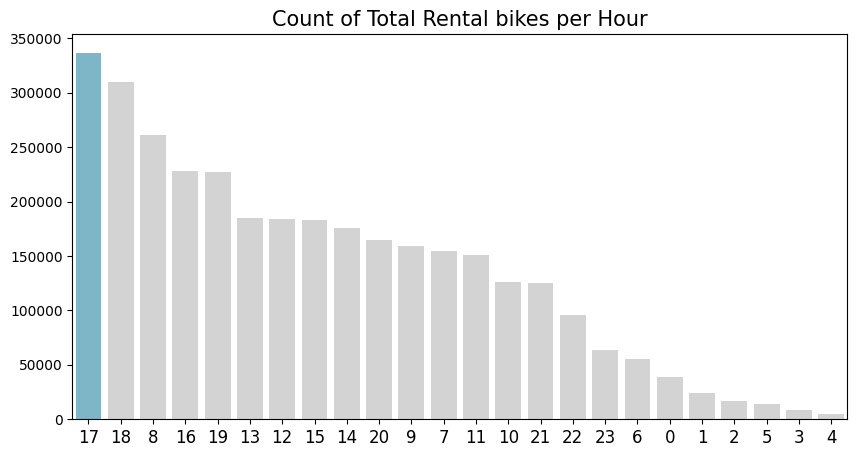

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
# Mengambil jumlah bar dari DataFrame
jumlah_bars = len(jamramaifix)

# Membuat daftar warna dengan panjang yang sama dengan jumlah bar
colors = ["#72BCD4"] + ["#D3D3D3"] * (jumlah_bars - 1)

jamramaifix_sorted = jamramaifix.sort_values(by="cnt_jam", ascending=False)

# Menentukan urutan berdasarkan nilai cnt_jam
order = jamramaifix_sorted["jam"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt_jam",
    x="jam",
    data=jamramaifix,
    palette=colors,
    order=order
)
plt.title("Count of Total Rental bikes per Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik diatas dapat diketahui bahwa pada pukul 17.00-18.00 merupakan jam teramai orang menyewa sepeda.

**Membuat barchart hari teramai**

In [150]:
hariramai2=hariteramai
# Menjadikan indeks sebagai kolom dan mereset indeks
hariramai2.reset_index(inplace=True)

# Mengganti nama kolom 'dteday' menjadi 'Tanggal' dan 'A' menjadi 'Sum'
hariramai2.rename(columns={'weekday': 'hari', 'instant': 'number', 'cnt': 'cnt_hari'}, inplace=True)



# Menampilkan DataFrame baru
print(hariramai2)

   hari  number  cnt_hari
0     0    2502    444027
1     1    2479    455503
2     2    2453    469109
3     3    2475    473048
4     4    2471    485395
5     5    2487    487790
6     6    2512    477807


In [151]:
hariramaifix = hariramai2[['hari','cnt_hari']]
print(hariramaifix)

   hari  cnt_hari
0     0    444027
1     1    455503
2     2    469109
3     3    473048
4     4    485395
5     5    487790
6     6    477807


<ipython-input-152-c3b63ed0026d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


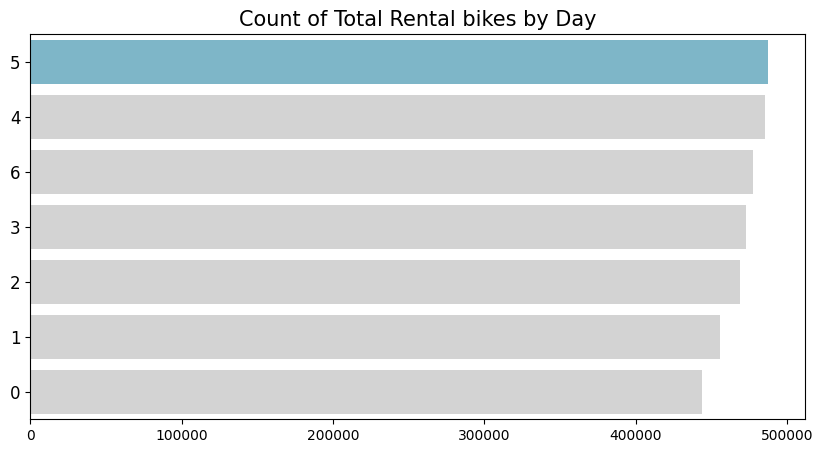

In [152]:
# Mengambil jumlah bar dari DataFrame
jumlah_bars2 = len(hariramaifix)

# Membuat daftar warna dengan panjang yang sama dengan jumlah bar
colors = ["#72BCD4"] + ["#D3D3D3"] * (jumlah_bars2 - 1)
hariramaifix_sorted = hariramaifix.sort_values(by="cnt_hari", ascending=False)

# Menentukan urutan berdasarkan nilai cnt_jam
order = hariramaifix_sorted["hari"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="cnt_hari",  # Menukar sumbu x dan y
    y="hari",      # Menukar sumbu x dan y
    data=hariramaifix,
    palette=colors,
    order=order,
    orient='h'
)
plt.title("Count of Total Rental bikes by Day", loc="center", fontsize=15)
plt.xlabel(None)  # Menghilangkan label sumbu x
plt.ylabel(None)  # Menghilangkan label sumbu y
plt.tick_params(axis='y', labelsize=12)  # Mengatur ukuran label sumbu y
plt.show()

Berdasarkan barchart di atas, diperoleh bahwa hari Sabtu merupakan hari teramai orang menyewa sepeda.




**Membuat donut chart cuaca teramai**

In [153]:
cuacaramai2=cuacateramai
# Menjadikan indeks sebagai kolom dan mereset indeks
cuacaramai2.reset_index(inplace=True)

# Mengganti nama kolom 'dteday' menjadi 'Tanggal' dan 'A' menjadi 'Sum'
cuacaramai2.rename(columns={'weathersit': 'cuaca', 'instant': 'number', 'cnt': 'cnt_cuaca'}, inplace=True)
cuacaramaifix = cuacaramai2[['cuaca', 'cnt_cuaca']]


# Menampilkan DataFrame baru
print(cuacaramaifix)

   cuaca  cnt_cuaca
0      1    2338173
1      2     795952
2      3     158331
3      4        223


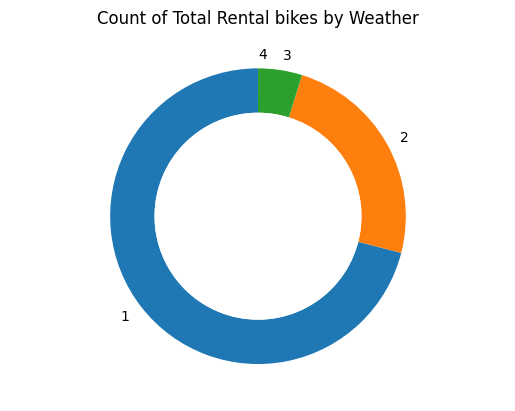

In [154]:
# Konfigurasi plot
fig, ax = plt.subplots()
ax.axis('equal')  # Agar lingkaran tampak lingkaran, bukan oval

# Plot lingkaran utama
wedges, texts = ax.pie(cuacaramaifix['cnt_cuaca'], labels=cuacaramaifix['cuaca'], wedgeprops=dict(width=0.3), startangle=90)

# Plot lingkaran dalam (bolong tengah)
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan plot
plt.title('Count of Total Rental bikes by Weather')
plt.show()

Berdasarkan grafik donut chart diatas dapat diketahui bahwa cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) merupakan cuaca dengan jumlah penyewaan sepeda terbanyak.

### Pertanyaan 1: Kapan waktu orang paling banyak melakukan rental sepeda ? (jam, hari, bulan, cuaca, jam kerja/holiday, musim)

In [155]:
# Jam
jamramaifix[jamramaifix.cnt_jam == jamramaifix.cnt_jam.max()]

,jam,cnt_jam
17,17,336860


Diperoleh bahwa jam paling banyak terjadi penyewaan sepeda adalah pada jam 17.00 - 18.00.

In [156]:
#Hari
hariramaifix[hariramaifix.cnt_hari == hariramaifix.cnt_hari.max()]

,hari,cnt_hari
5,5,487790


Diperoleh bahwa hari paling banyak terjadi penyewaan sepeda adalah pada hari Sabtu.

In [157]:
# Bulan
monthly_cnt[monthly_cnt.cnt_month == monthly_cnt.cnt_month.max()]

,month,cnt_month
20,2012-09-30,218573


Diperoleh bahwa bulan paling banyak terjadi penyewaan sepeda adalah pada bulan September

In [158]:
# Cuaca
cuacaramaifix[cuacaramaifix.cnt_cuaca == cuacaramaifix.cnt_cuaca.max()]

,cuaca,cnt_cuaca
0,1,2338173


Diperoleh bahwa cuaca paling banyak terjadi penyewaan sepeda adalah pada cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy).

In [159]:
#Workday/Holiday
print(workdayteramai)


            instant      cnt
workingday                  
0              5514  1000269
1             11865  2292410


Diperoleh bahwa waktu paling banyak terjadi penyewaan sepeda adalah pada working day.

In [160]:
#Musim
musimramaifix[musimramaifix.cnt_musim == musimramaifix.cnt_musim.max()]

,musim,cnt_musim
2,3,1061129


Diperoleh bahwa musim paling banyak terjadi penyewaan sepeda adalah pada musim 3 (fall).

### Pertanyaan 2: Bagaimana pengaruh variabel lain terhadap variabel jumlah rental bike?, mana yang paling berpengaruh positif/negatif?

Pertama-tama, akan dirumuskan dummy variabel terlebih dahulu

In [161]:
import pandas as pd
import statsmodels.api as sm

# Mengubah variabel kategorikal menjadi variabel dummy
dataGLM = pd.get_dummies(bikesharing_df_cleaned, columns=['season','holiday', 'weekday', 'workingday','mnth', 'hr', 'weathersit'], drop_first=False)
print(dataGLM)

       instant     dteday  yr   temp   atemp   hum  windspeed  casual  \
0            1 2011-01-01   0   9.84  14.395  81.0     0.0000       3   
1            2 2011-01-01   0   9.02  13.635  80.0     0.0000       8   
2            3 2011-01-01   0   9.02  13.635  80.0     0.0000       5   
3            4 2011-01-01   0   9.84  14.395  75.0     0.0000       3   
4            5 2011-01-01   0   9.84  14.395  75.0     0.0000       0   
...        ...        ...  ..    ...     ...   ...        ...     ...   
17374    17375 2012-12-31   1  10.66  12.880  60.0    11.0014      11   
17375    17376 2012-12-31   1  10.66  12.880  60.0    11.0014       8   
17376    17377 2012-12-31   1  10.66  12.880  60.0    11.0014       7   
17377    17378 2012-12-31   1  10.66  13.635  56.0     8.9981      13   
17378    17379 2012-12-31   1  10.66  13.635  65.0     8.9981      12   

       registered  cnt  ...  hr_18  hr_19  hr_20  hr_21  hr_22  hr_23  \
0              13   16  ...      0      0      0  

Selanjutnya, dibentuk model GLM nya.

In [162]:
# Memilih fitur dan variabel target
X = dataGLM[['season_1','season_2','season_3','season_4','holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'temp', 'atemp', 'hum', 'windspeed', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']]
y = dataGLM['cnt']

# Tambahkan konstanta untuk model GLM
X = sm.add_constant(X)

# Membuat model GLM (regresi linier)
model = sm.GLM(y, X, family=sm.families.Gaussian())  # Gaussian family untuk regresi linier
result = model.fit()

# Menampilkan hasil summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                17379
Model:                            GLM   Df Residuals:                    17327
Model Family:                Gaussian   Df Model:                           51
Link Function:               Identity   Scale:                          12134.
Method:                          IRLS   Log-Likelihood:            -1.0635e+05
Date:                Mon, 04 Mar 2024   Deviance:                   2.1025e+08
Time:                        23:47:46   Pearson chi2:                 2.10e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8199
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.4414      6.825      5.486   

Dengan tingkat konfidensi 95%, variabel yang tidak signifikan dapat dihilangkan dgn metode backward elimination. \\
Namun dengan asumsi semua variabel penting dan dibutuhkan maka tidak akan dilakukan backward elimination, sehingga diperoleh persamaan jumlah rental perjam (y) adalah

y = 37.4414 - 24.2387 * season_1 + 15.2519 * season_2 + 4.6191 * season_3 + 41.8092 * season_4 + 30.2530 * holiday_0 + 7.1884 * holiday_1 - 2.4278 * weekday_0 + 2.3178 * weekday_1 + 3.5350 * weekday_2 +  6.5602 * weekday_3 +  5.2632 * weekday_4 + 9.8939 * weekday_5 + 12.2991 * weekday_6 + 17.0597 * workingday_0 + 20.3817 * workingday_1 + 4.7608 * temp + 2.0791 * atemp - 1.1490 * hum - 0.6453 * windspeed - 0.5152 * mnth_1 - 0.9761 * mnth_2 + 3.9051 * mnth_3 - 9.7147 * mnth_4 - 21.2492 * mnth_6 - 41.2841 * mnth_7 - 16.1198 * mnth_8 + 14.9906 * mnth_9 + 3.4264 * mnth_10 - 16.0978 * mnth_11 - 9.8315 * mnth_12 - 119.3849 * hr_0 - 135.8825 * hr_1 - 143.7984 * hr_2 - 153.7002 * hr_3 - 155.3935 * hr_4 - 139.1401 * hr_5 - 80.6008 * hr_6 + 53.5082 * hr_7 + 192.2597 * hr_8 + 42.1238 * hr_9 - 15.1742 * hr_10 + 7.6172 * hr_11 + 44.7889 * hr_12 + 38.3472 * hr_13 + 21.6289 * hr_14 + 30.8037 * hr_15 + 93.2864 * hr_16 + 248.1057 * hr_17 + 217.6249 * hr_18 + 111.0399 * hr_19 + 33.1204 * hr_20 - 14.8058 * hr_21 - 50.5416 * hr_22 - 88.3916 * hr_23 + 34.3383 * weathersit_1 + 27.9669 * weathersit_2 - 26.0328 * weathersit_3 + 1.1690* weathersit_4

\\
Dengan asumsi ceteris paribus, diperoleh bahwa variabel yang paling berpengaruh positif adalah variabel hr_17 dimana setiap penambahan 1 nilai variabel hr_17 membuat kenaikan nilai y (cnt) sebesar 248.1057.
\
Diperoleh juga variabel yang paling berpengaruh negatif adalah variabel hr_4 dimana setiap penambahan 1 nilai hr_4 membuat penurunan nilai y sebesar 155.3935.

## Conclusion

- Conclution pertanyaan 1 \\
Diketahui waktu-waktu berikut merupakan waktu penyewaan sepeda paling ramai/banyak berdasarkan variabel cnt (count of total rental bikes including both casual and registered) : \\
Jam : Pukul 17.00 - 18.00 \\
Hari : Sabtu \\
Bulan : September \\
Cuaca : Cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) \\
Working Day/Holiday : Working Day \\
Musim : 3 (Fall) \\
- Conclution pertanyaan 2 \\
Dengan asumsi semua variabel penting dan dibutuhkan maka tidak akan dilakukan backward elimination, sehingga diperoleh persamaan jumlah rental sepeda perjam (y) adalah

y = 37.4414 - 24.2387 * season_1 + 15.2519 * season_2 + 4.6191 * season_3 + 41.8092 * season_4 + 30.2530 * holiday_0 + 7.1884 * holiday_1 - 2.4278 * weekday_0 + 2.3178 * weekday_1 + 3.5350 * weekday_2 +  6.5602 * weekday_3 +  5.2632 * weekday_4 + 9.8939 * weekday_5 + 12.2991 * weekday_6 + 17.0597 * workingday_0 + 20.3817 * workingday_1 + 4.7608 * temp + 2.0791 * atemp - 1.1490 * hum - 0.6453 * windspeed - 0.5152 * mnth_1 - 0.9761 * mnth_2 + 3.9051 * mnth_3 - 9.7147 * mnth_4 - 21.2492 * mnth_6 - 41.2841 * mnth_7 - 16.1198 * mnth_8 + 14.9906 * mnth_9 + 3.4264 * mnth_10 - 16.0978 * mnth_11 - 9.8315 * mnth_12 - 119.3849 * hr_0 - 135.8825 * hr_1 - 143.7984 * hr_2 - 153.7002 * hr_3 - 155.3935 * hr_4 - 139.1401 * hr_5 - 80.6008 * hr_6 + 53.5082 * hr_7 + 192.2597 * hr_8 + 42.1238 * hr_9 - 15.1742 * hr_10 + 7.6172 * hr_11 + 44.7889 * hr_12 + 38.3472 * hr_13 + 21.6289 * hr_14 + 30.8037 * hr_15 + 93.2864 * hr_16 + 248.1057 * hr_17 + 217.6249 * hr_18 + 111.0399 * hr_19 + 33.1204 * hr_20 - 14.8058 * hr_21 - 50.5416 * hr_22 - 88.3916 * hr_23 + 34.3383 * weathersit_1 + 27.9669 * weathersit_2 - 26.0328 * weathersit_3 + 1.1690* weathersit_4

\
Dengan asumsi ceteris paribus, diperoleh bahwa variabel yang paling berpengaruh positif adalah variabel hr_17 dimana setiap penambahan 1 nilai variabel hr_17 membuat kenaikan nilai y (cnt) sebesar 248.1057.
\
Diperoleh juga variabel yang paling berpengaruh negatif adalah variabel hr_4 dimana setiap penambahan 1 nilai hr_4 membuat penurunan nilai y sebesar 155.3935.